# 5. Simple Vizualisations

## Import libraries and Data

In [5]:
import pandas as pd
import os
import plotly.graph_objects as go
import kaleido
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
local_dir="/Users/antonioslagarias/data-science-code/"

os.chdir(local_dir)

In [9]:
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: /Users/antonioslagarias/data-science-code


In [49]:
OUT_PATH_VIS="ift6758/visualizations/simple_vis/"

In [50]:
print(local_dir+OUT_PATH_VIS)

/Users/antonioslagarias/data-science-code/ift6758/visualizations/simple_vis/


## First figure

Instructions : Produce a figure comparing the shot types over all teams (i.e. just aggregate all of the shots), in a season of your choosing. Overlay the number of goals
overtop the number of shots. What appears to be the most dangerous type of
shot? The most common type of shot? Why did you choose this figure? Add this
figure and discussion to your blog post.

Reasoning:
For this exercice, we choose the season with most recorded events, i.e. 2021-2022
The objective is to vizualize in the single figure the relationship between shots, goals and type of shots (wrist, snap, slap, backhand, tip-in, deflected, wrap-around).
For this we first need to know the ratio of goals vs shots per type of shot.

### First Figure_prep

In [13]:
path="ift6758/data/2016-2024_processed/2021-2022_events.csv"
df_2021=pd.read_csv(path)
df_2021.head(5)

,game_id,season,game_type,event_type,period,period_time,x_coord,y_coord,shot_type,team_id,team_name,player_name,goalie_name
0,2021020001,2021,regular,SHOT_ON_GOAL,1,01:03,61,-32,wrist,14,Tampa Bay Lightning,Steven Stamkos,Tristan Jarry
1,2021020001,2021,regular,SHOT_ON_GOAL,1,01:44,-65,19,wrist,5,Pittsburgh Penguins,Brock McGinn,Andrei Vasilevskiy
2,2021020001,2021,regular,SHOT_ON_GOAL,1,02:01,-8,-27,wrist,14,Tampa Bay Lightning,Jan Rutta,Tristan Jarry
3,2021020001,2021,regular,SHOT_ON_GOAL,1,02:47,-60,-4,wrist,5,Pittsburgh Penguins,Danton Heinen,Andrei Vasilevskiy
4,2021020001,2021,regular,SHOT_ON_GOAL,1,03:07,63,4,wrist,14,Tampa Bay Lightning,Ondrej Palat,Tristan Jarry


In [14]:
sums_shots= df_2021["shot_type"].value_counts()
print(sums_shots.sort_values(ascending=False))

shot_type
wrist          51806
snap           11875
slap           11481
backhand        7149
tip-in          4756
deflected       1739
wrap-around      776
Name: count, dtype: int64


In [15]:
ratios = (
    df_2021.groupby("shot_type")["event_type"]
    .apply(lambda x: (x=="GOAL").mean() * 100).round(2)

)
print(ratios.sort_values(ascending=False))

shot_type
tip-in         16.90
deflected      16.33
backhand       12.45
snap           11.60
wrist           9.08
slap            7.23
wrap-around     5.54
Name: event_type, dtype: float64


In [16]:
sums_goals = (
    df_2021.groupby("shot_type")["event_type"]
    .apply(lambda x: (x=="GOAL").sum())

)
print(sums_goals.sort_values(ascending=False))

shot_type
wrist          4704
snap           1378
backhand        890
slap            830
tip-in          804
deflected       284
wrap-around      43
Name: event_type, dtype: int64


In [17]:
df_2021.groupby("shot_type").size().sort_index()

shot_type
backhand        7149
deflected       1739
slap           11481
snap           11875
tip-in          4756
wrap-around      776
wrist          51806
dtype: int64

### First Figure_tests

In [18]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=sums_shots.index.astype(str),
    y=sums_shots.values,
    name=f'B = "{"GOAL"}"',
    marker_color="orange"
))

fig.update_layout(
    title=f'Counts',
    xaxis_title="Type of Shot",
    yaxis_title="Total Shots",
)

fig.show()

### First Figure_choice

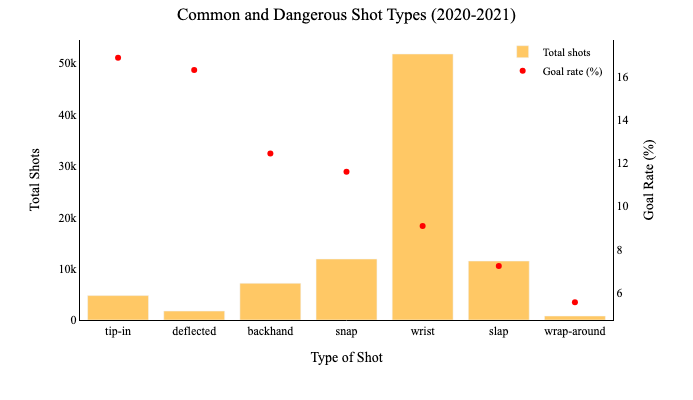

In [19]:
order = ratios.sort_values(ascending=False).index

ratios_sorted = ratios.loc[order]
sums_shots_sorted = sums_shots.loc[order]

fig = go.Figure()

# Bar: total shots
fig.add_trace(go.Bar(
    x=sums_shots_sorted.index.astype(str),
    y=sums_shots_sorted.values,
    name="Total shots",
    marker_color="orange",
    opacity=0.6,
    yaxis="y1"
))

# Line: ratio (%) of goals, second axis
fig.add_trace(go.Scatter(
    x=ratios_sorted.index.astype(str),
    y=ratios_sorted.values,
    name="Goal rate (%)",
    mode="markers",
    marker=dict(color="red"),
    yaxis="y2"
))

# Layout with dual y-axes

family_titles="Times New Roman"
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    title=dict(
    text="Common and Dangerous Shot Types (2020-2021)",
    font=dict(size=17, family=family_titles, color="black"),  # title font
    x=0.5,
    pad=dict(t=1)

    ),
    xaxis=dict(
        title=dict(
            text="Type of Shot",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis=dict(
        title=dict(
            text="Total Shots",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis2=dict(
        title=dict(
            text="Goal Rate (%)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        overlaying="y",
        side="right",
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    legend=dict(
        x=0.99, y=1.01,              
        xanchor="right", yanchor="top",
        font=dict(size=11, family=family_titles, color="black"),
        bgcolor="rgba(255,255,255,0.5)"  # optional background
    ),
    barmode="group",
    margin=dict(t=40)
    )

#fig.add_annotation(
#    text=caption,
#    xref="paper", yref="paper",
#    x=1.1, y=-0.4,
#    showarrow=False,
#    font=dict(size=12, family=family_titles, color="black"),
#    align="left"
#)
fig.update_layout(width=800, height=400)
fig.write_image(OUT_PATH_VIS+"Shot_Types_2020_2021.svg")   # SVG
fig.write_image(OUT_PATH_VIS+"Shot_Types_2020_2021.png", scale=5)
fig.show()

In [20]:
caption=("This figure compares the different types of shot during the 2021-2022 seasons. The bars show the total number of shots per type.<br>"
          "Bars show total shots with goals stacked on top.The markers shows the rate of goals per type (%). We observe that the most common<br>" 
        "type of shot is by far the 'wrist', while the most dangerous, i.e. the one with the highest scoring rate is the 'tip-in'.")
print(caption)

This figure compares the different types of shot during the 2021-2022 seasons. The bars show the total number of shots per type.<br>Bars show total shots with goals stacked on top.The markers shows the rate of goals per type (%). We observe that the most common<br>type of shot is by far the 'wrist', while the most dangerous, i.e. the one with the highest scoring rate is the 'tip-in'.


In [21]:
exp=("A single figure is sufficient for this task. On a single view, it is possible to see the total number of shots and understand the most common ones."
     "However, since the scoring rate is more important as information, the bars have been sorted by decreasing rate values.")
print(exp)

A single figure is sufficient for this task. On a single view, it is possible to see the total number of shots and understand the most common ones.However, since the scoring rate is more important as information, the bars have been sorted by decreasing rate values.


## Second Figure

Instruction: 
What is the relationship between the distance a shot was taken and the chance
it was a goal? Produce a figure for each season between 2018-19 to 2020-21
to answer this, and add it to your blog post along with a couple of sentences
describing your figure. Has there been much change over the past three
seasons? Why did you choose this figure?

In [22]:
### Second Figure_prep

In [23]:
'''Import the data on the three concerned seasons'''

df_2018=pd.read_csv("ift6758/data/2016-2024_processed/2018-2019_events.csv")
df_2019=pd.read_csv("ift6758/data/2016-2024_processed/2019-2020_events.csv")
df_2020=pd.read_csv("ift6758/data/2016-2024_processed/2020-2021_events.csv")

In [24]:
df_2018.head()

,game_id,season,game_type,event_type,period,period_time,x_coord,y_coord,shot_type,team_id,team_name,player_name,goalie_name
0,2018020001,2018,regular,SHOT_ON_GOAL,1,00:29,78.0,-19.0,backhand,8,Montréal Canadiens,Artturi Lehkonen,Frederik Andersen
1,2018020001,2018,regular,SHOT_ON_GOAL,1,00:49,-37.0,-10.0,snap,10,Toronto Maple Leafs,Morgan Rielly,Carey Price
2,2018020001,2018,regular,SHOT_ON_GOAL,1,01:00,47.0,-23.0,wrist,8,Montréal Canadiens,Brendan Gallagher,Frederik Andersen
3,2018020001,2018,regular,SHOT_ON_GOAL,1,03:54,53.0,14.0,snap,8,Montréal Canadiens,Brendan Gallagher,Frederik Andersen
4,2018020001,2018,regular,SHOT_ON_GOAL,1,04:06,77.0,-2.0,snap,8,Montréal Canadiens,Mike Reilly,Frederik Andersen


In [25]:
"""Write a function to calculate the distance from coordinates"""

def calculate_distance(df):
    df['x_shot'] = df['x_coord']
    df['y_shot'] = df['y_coord']

    # If x < 0, mirror the rink
    df.loc[df['x_coord'] < 0, 'x_shot'] = -df.loc[df['x_coord'] < 0, 'x_coord']
    df.loc[df['x_coord'] < 0, 'y_shot'] = -df.loc[df['x_coord'] < 0, 'y_coord']
    valid_coords = df['x_shot'].notna() & df['y_shot'].notna()

    df.loc[valid_coords, 'distance_from_net'] = (
    ((89 - df.loc[valid_coords, 'x_shot'])**2 + (df.loc[valid_coords, 'y_shot'])**2) ** 0.5)

    df.loc[valid_coords, 'shot_angle'] = np.degrees(
    np.arctan2(np.abs(df.loc[valid_coords, 'y_shot']), 89 - df.loc[valid_coords, 'x_shot'])
    )
    return df

In [26]:
df_2018=calculate_distance(df_2018)
df_2019=calculate_distance(df_2019)
df_2020=calculate_distance(df_2020)

### Second Figure_tests

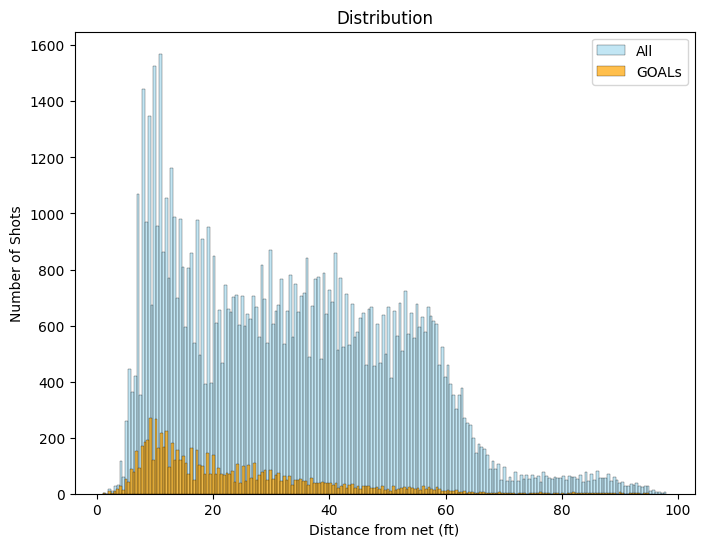

In [27]:
"""Visualize the distribution of the distances to see that it all looks corrrect"""

temp_all=df_2018["distance_from_net"]
temp_goal=df_2018.loc[df_2018["event_type"] == "GOAL", "distance_from_net"]

plt.figure(figsize=(8,6))

sns.histplot(temp_all, color="skyblue", label="All", kde=False, bins=200, alpha=0.5)
sns.histplot(temp_goal, color="orange", label="GOALs", kde=False, bins=200, alpha=0.7)

plt.title("Distribution")
plt.xlabel("Distance from net (ft)")
plt.ylabel("Number of Shots")
plt.legend()
plt.show()

In [28]:
'''Write a function to caclulate the metrics needed for the figure'''
bin_size = 5

def calculate_metrics(df):

    df['distance_bin'] = (df['distance_from_net'].dropna() // bin_size * bin_size).astype(int)

    shots_per_bin = df.groupby('distance_bin').size()

    goals_per_bin = df.loc[df['event_type'] == "GOAL"].groupby('distance_bin').size()

    shots_per_sum = (shots_per_bin / shots_per_bin.sum()*100).round(2)
    
    # 4. Compute goal rate (goals / shots)
    rate_per_bin = ((goals_per_bin / shots_per_bin).fillna(0)*100).round(2)

    return shots_per_bin, rate_per_bin, shots_per_sum

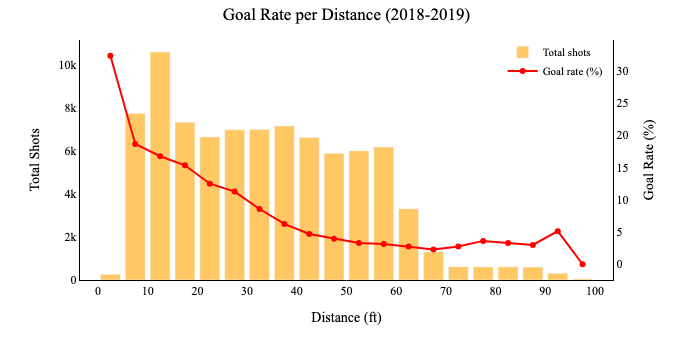

In [29]:
'''test for one season'''

shots_per_bin, rate_per_bin, shots_per_sum=calculate_metrics(df_2018)

fig = go.Figure()


fig.add_trace(go.Bar(
    x=(shots_per_bin.index.astype(int) + bin_size/2),  # bin midpoints
    y=shots_per_bin.values,
    name="Total shots",
    marker_color="orange",
    opacity=0.6,
    yaxis="y1"
))

fig.add_trace(go.Scatter(
    x=(rate_per_bin.index.astype(int) + bin_size/2),
    y=rate_per_bin.values,
    name="Goal rate (%)",
    mode="markers+lines",
    marker=dict(color="red"),
    yaxis="y2"
))


family_titles="Times New Roman"
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    title=dict(
    text="Goal Rate per Distance (2018-2019)",
    font=dict(size=17, family=family_titles, color="black"),  # title font
    x=0.5,
    pad=dict(t=1)

    ),
    xaxis=dict(
        title=dict(
            text="Distance (ft)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis=dict(
        title=dict(
            text="Total Shots",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis2=dict(
        title=dict(
            text="Goal Rate (%)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tick0=0,
        dtick=5,  
        tickfont=dict(size=12, family=family_titles, color="black"),
        overlaying="y",
        side="right",
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    legend=dict(
        x=0.99, y=1.01,              
        xanchor="right", yanchor="top",
        font=dict(size=11, family=family_titles, color="black"),
        bgcolor="rgba(255,255,255,0.5)"  # optional background
    ),
    barmode="group",
    margin=dict(t=40)
    )

fig.update_xaxes(
    tick0=0,   # where ticks start
    dtick=10,  # step size
    tickmode="linear"
)

#fig.add_annotation(
#    text=caption,
#    xref="paper", yref="paper",
#    x=1.1, y=-0.4,
#    showarrow=False,
#    font=dict(size=12, family=family_titles, color="black"),
#    align="left"
#)

#fig.write_image("shot_types.svg")   # SVG
#fig.write_image("distance2018.png", scale=5)
fig.show()

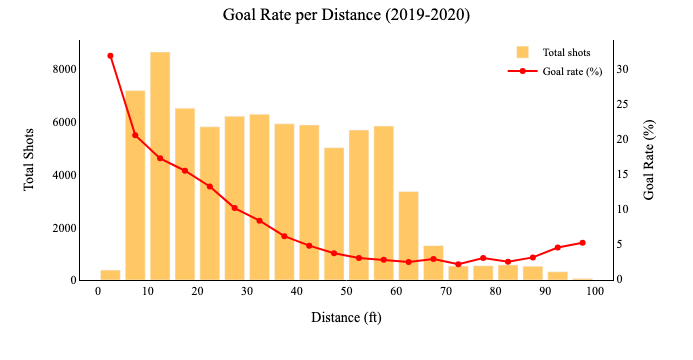

In [30]:
shots, rate, rate_of_shots = calculate_metrics(df_2019)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=(shots.index.astype(int) + bin_size/2),  # bin midpoints
    y=shots.values,
    name="Total shots",
    marker_color="orange",
    opacity=0.6,
    yaxis="y1"
))

fig.add_trace(go.Scatter(
    x=(rate.index.astype(int) + bin_size/2),
    y=rate.values,
    name="Goal rate (%)",
    mode="markers+lines",
    marker=dict(color="red"),
    yaxis="y2"
))


family_titles="Times New Roman"
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    title=dict(
    text="Goal Rate per Distance (2019-2020)",
    font=dict(size=17, family=family_titles, color="black"),  # title font
    x=0.5,
    pad=dict(t=1)

    ),
    xaxis=dict(
        title=dict(
            text="Distance (ft)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis=dict(
        title=dict(
            text="Total Shots",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis2=dict(
        title=dict(
            text="Goal Rate (%)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        overlaying="y",
        side="right",
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    legend=dict(
        x=0.99, y=1.01,              
        xanchor="right", yanchor="top",
        font=dict(size=11, family=family_titles, color="black"),
        bgcolor="rgba(255,255,255,0.5)"  # optional background
    ),
    barmode="group",
    margin=dict(t=40)
    )

fig.update_xaxes(
    tick0=0,   # where ticks start
    dtick=10,  # step size
    tickmode="linear"
)

#fig.add_annotation(
#    text=caption,
#    xref="paper", yref="paper",
#    x=1.1, y=-0.4,
#    showarrow=False,
#    font=dict(size=12, family=family_titles, color="black"),
#    align="left"
#)


#fig.write_image("distance2019.png", scale=5)
fig.show()

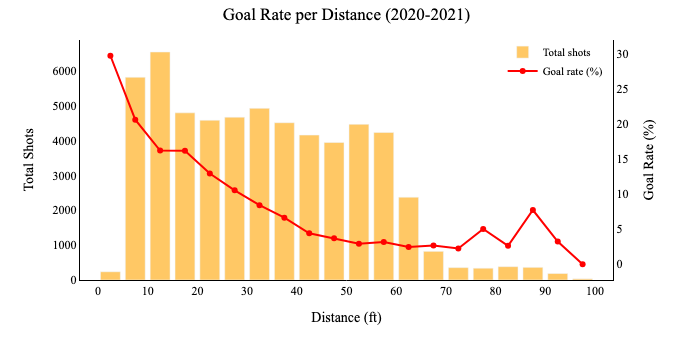

In [31]:
shots, rate, rate_of_shots = calculate_metrics(df_2020)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=(shots.index.astype(int) + bin_size/2),  # bin midpoints
    y=shots.values,
    name="Total shots",
    marker_color="orange",
    opacity=0.6,
    yaxis="y1"
))

fig.add_trace(go.Scatter(
    x=(rate.index.astype(int) + bin_size/2),
    y=rate.values,
    name="Goal rate (%)",
    mode="markers+lines",
    marker=dict(color="red"),
    yaxis="y2"
))


family_titles="Times New Roman"
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    title=dict(
    text="Goal Rate per Distance (2020-2021)",
    font=dict(size=17, family=family_titles, color="black"),  # title font
    x=0.5,
    pad=dict(t=1)

    ),
    xaxis=dict(
        title=dict(
            text="Distance (ft)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis=dict(
        title=dict(
            text="Total Shots",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis2=dict(
        title=dict(
            text="Goal Rate (%)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        overlaying="y",
        side="right",
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    legend=dict(
        x=0.99, y=1.01,              
        xanchor="right", yanchor="top",
        font=dict(size=11, family=family_titles, color="black"),
        bgcolor="rgba(255,255,255,0.5)"  # optional background
    ),
    barmode="group",
    margin=dict(t=40)
    )

fig.update_xaxes(
    tick0=0,   # where ticks start
    dtick=10,  # step size
    tickmode="linear"
)

#fig.add_annotation(
#    text=caption,
#    xref="paper", yref="paper",
#    x=1.1, y=-0.4,
#    showarrow=False,
#    font=dict(size=12, family=family_titles, color="black"),
#    align="left"
#)

#fig.write_image("shot_types.svg")   # SVG
#fig.write_image("distance2020.png", scale=5)
fig.show()

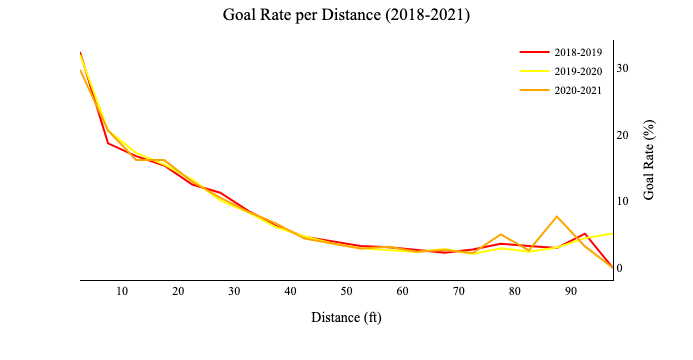

In [32]:
''' Create a single figure for all seasons'''

shots1, rate1, rate_of_shots1 = calculate_metrics(df_2018)
shots2, rate2, rate_of_shots2 = calculate_metrics(df_2019)
shots3, rate3, rate_of_shots3 = calculate_metrics(df_2020)


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=(rate1.index.astype(int) + bin_size/2),
    y=rate1.values,
    name="2018-2019",
    mode="lines",
    marker=dict(color="red"),
    yaxis="y2"
))

fig.add_trace(go.Scatter(
    x=(rate2.index.astype(int) + bin_size/2),
    y=rate2.values,
    name="2019-2020",
    mode="lines",
    marker=dict(color="yellow"),
    yaxis="y2"
))

fig.add_trace(go.Scatter(
    x=(rate3.index.astype(int) + bin_size/2),
    y=rate3.values,
    name="2020-2021",
    mode="lines",
    marker=dict(color="orange"),
    yaxis="y2"
))



family_titles="Times New Roman"
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    title=dict(
    text="Goal Rate per Distance (2018-2021)",
    font=dict(size=17, family=family_titles, color="black"),  # title font
    x=0.5,
    pad=dict(t=1)

    ),
    xaxis=dict(
        title=dict(
            text="Distance (ft)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis=dict(
        title=dict(
            text="Total Shots",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis2=dict(
        title=dict(
            text="Goal Rate (%)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        overlaying="y",
        side="right",
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    legend=dict(
        x=0.99, y=1.01,              
        xanchor="right", yanchor="top",
        font=dict(size=11, family=family_titles, color="black"),
        bgcolor="rgba(255,255,255,0.5)"  # optional background
    ),
    barmode="group",
    margin=dict(t=40)
    )

fig.update_xaxes(
    tick0=0,   # where ticks start
    dtick=10,  # step size
    tickmode="linear"
)

#fig.write_image("distance_all.png", scale=5)
fig.show()


### Second Figure_choice

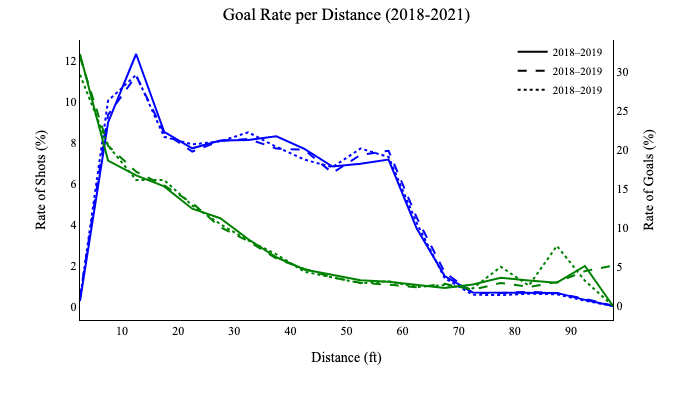

In [33]:
''' Create a single figure for all seasons'''
'''Display shots rate instead of total goals to improve lisibility'''

shots1, rate1, rate_of_shots1 = calculate_metrics(df_2018)
shots2, rate2, rate_of_shots2 = calculate_metrics(df_2019)
shots3, rate3, rate_of_shots3 = calculate_metrics(df_2020)


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=(rate1.index.astype(int) + bin_size/2),
    y=rate1.values,
    name="2018-2019",
    mode="lines",
    marker=dict(color="red"),
    line=dict(color="green", dash="solid", width=2),
    yaxis="y2",
    showlegend=False

))

fig.add_trace(go.Scatter(
    x=(rate2.index.astype(int) + bin_size/2),
    y=rate2.values,
    name="2019-2020",
    mode="lines",
    marker=dict(color="yellow"),
    line=dict(color="green", dash="dash", width=2),
    yaxis="y2",
    showlegend=False

))

fig.add_trace(go.Scatter(
    x=(rate3.index.astype(int) + bin_size/2),
    y=rate3.values,
    name="2020-2021",
    mode="lines",
    marker=dict(color="orange"),
    line=dict(color="green", dash="dot", width=2),
    yaxis="y2",
    showlegend=False

))

fig.add_trace(go.Scatter(
    x=(rate1.index.astype(int) + bin_size/2),
    y=rate_of_shots1.values,
    name="2018-2019",
    mode="lines",
    marker=dict(color="red"),
    line=dict(color="blue", dash="solid", width=2),
    yaxis="y1",
    showlegend=False
))

fig.add_trace(go.Scatter(
    x=(rate2.index.astype(int) + bin_size/2),
    y=rate_of_shots2.values,
    name="2019-2020",
    mode="lines",
    marker=dict(color="yellow"),
    line=dict(color="blue", dash="dash", width=2),
    yaxis="y1",
    showlegend=False
))

fig.add_trace(go.Scatter(
    x=(rate3.index.astype(int) + bin_size/2),
    y=rate_of_shots3.values,
    name="2020-2021",
    mode="lines",
    marker=dict(color="orange"),
    line=dict(color="blue", dash="dot", width=2),
    yaxis="y1",
    showlegend=False
))

'''Here we add one dummy set of lines only to be displayed as the legend'''
fig.add_trace(go.Scatter(
    x=[None], y=[None],         
    mode="lines",
    line=dict(color="black", dash="solid", width=2),
    name="2018–2019",             
    hoverinfo="skip"             
))
fig.add_trace(go.Scatter(
    x=[None], y=[None],          
    mode="lines",
    line=dict(color="black", dash="dash", width=2),
    name="2018–2019",             
    hoverinfo="skip"              
))
fig.add_trace(go.Scatter(
    x=[None], y=[None],           
    mode="lines",
    line=dict(color="black", dash="dot", width=2),
    name="2018–2019",             
    hoverinfo="skip"              
))



family_titles="Times New Roman"
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    title=dict(
    text="Goal Rate per Distance (2018-2021)",
    font=dict(size=17, family=family_titles, color="black"),  # title font
    x=0.5,
    pad=dict(t=1)

    ),
    xaxis=dict(
        title=dict(
            text="Distance (ft)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis=dict(
        title=dict(
            text="Rate of Shots (%)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    yaxis2=dict(
        title=dict(
            text="Rate of Goals (%)",
            font=dict(size=14, family=family_titles, color="black")
        ),
        tickfont=dict(size=12, family=family_titles, color="black"),
        overlaying="y",
        side="right",
        showgrid=False,
        zeroline=False,      
        showline=True,       
        linecolor="black",   
        linewidth=1        
    ),
    legend=dict(
        x=0.99, y=1.01,              
        xanchor="right", yanchor="top",
        font=dict(size=11, family=family_titles, color="black"),
        bgcolor="rgba(255,255,255,0.5)"
    ),
    barmode="group",
    margin=dict(t=40)
    )

fig.update_xaxes(
    tick0=0,   # where ticks start
    dtick=10,  # step size
    tickmode="linear"
)
fig.update_layout(width=800, height=400)
fig.write_image(OUT_PATH_VIS+"Goal Rate per Distance (All Seasons).png", scale=5)
fig.write_image(OUT_PATH_VIS+"Goal Rate per Distance (All Seasons).svg")
fig.show()

In [34]:
caption=("The figure shows the rate of goals according to distance from the net (right), compared to the rate of shots per distance"
         "To compute the lines, the distances were groupped in 5ft bins, e.g. 0-5, 5-10, etc. We observe that both the behaviour of the players (rate of shots) and the successful rate of goals remains"
         "consistent throughout the seasons. We also observe that the closest the shot is to the net, the higher its chances to be a goal. However, shots from a distance less than 6 feet are very rare."
         "Most successful shots come from a distance between 6 and 18 ft (approximately), i.e. the most dangerous zones where there are both a lot of shots and a lot of goals")
print(caption)

The figure shows the rate of goals according to distance from the net (right), compared to the rate of shots per distanceTo compute the lines, the distances were groupped in 5ft bins, e.g. 0-5, 5-10, etc. We observe that both the behaviour of the players (rate of shots) and the successful rate of goals remainsconsistent throughout the seasons. We also observe that the closest the shot is to the net, the higher its chances to be a goal. However, shots from a distance less than 6 feet are very rare.Most successful shots come from a distance between 6 and 18 ft (approximately), i.e. the most dangerous zones where there are both a lot of shots and a lot of goals


## Third Figure

Instruction : Combine the information from the previous sections to produce a figure that
shows the goal percentage (# goals / # shots) as a function of both distance
from the net, and the category of shot types (you can pick a single season of
your choice). Briefly discuss your findings; e.g. what might be the most
dangerous types of shots?

### Third Figure_prep

In [34]:
'''We work with the same season as before (2021-2022)'''

path="ift6758/data/2016-2024_processed/2021-2022_events.csv"
df_2021=pd.read_csv(path)
df_2021.head(5)

,game_id,season,game_type,event_type,period,period_time,x_coord,y_coord,shot_type,team_id,team_name,player_name,goalie_name
0,2021020001,2021,regular,SHOT_ON_GOAL,1,01:03,61,-32,wrist,14,Tampa Bay Lightning,Steven Stamkos,Tristan Jarry
1,2021020001,2021,regular,SHOT_ON_GOAL,1,01:44,-65,19,wrist,5,Pittsburgh Penguins,Brock McGinn,Andrei Vasilevskiy
2,2021020001,2021,regular,SHOT_ON_GOAL,1,02:01,-8,-27,wrist,14,Tampa Bay Lightning,Jan Rutta,Tristan Jarry
3,2021020001,2021,regular,SHOT_ON_GOAL,1,02:47,-60,-4,wrist,5,Pittsburgh Penguins,Danton Heinen,Andrei Vasilevskiy
4,2021020001,2021,regular,SHOT_ON_GOAL,1,03:07,63,4,wrist,14,Tampa Bay Lightning,Ondrej Palat,Tristan Jarry


In [35]:
df_2021=calculate_distance(df_2021)

In [36]:
df_2021['distance_bin'] = (df_2021['distance_from_net'].dropna() // bin_size * bin_size).astype(int)

In [37]:
grouped = (df_2021
           .groupby(['shot_type', 'distance_bin'])
           .size()
           .rename('shots')
           .reset_index()
           .sort_values(['shot_type', 'distance_bin']))

# optional: human-friendly bin labels like "0-10"
grouped['bin_label'] = grouped['distance_bin'].map(lambda s: f"{int(s)}-{int(s + bin_size)}")

'''Visualize the metrics to be sure it is correct'''
print(grouped[['shot_type', 'bin_label', 'shots']].to_string(index=False))

  shot_type bin_label  shots
   backhand       0-5     68
   backhand      5-10   2065
   backhand     10-15   2085
   backhand     15-20   1023
   backhand     20-25    586
   backhand     25-30    370
   backhand     30-35    210
   backhand     35-40    169
   backhand     40-45     95
   backhand     45-50     85
   backhand     50-55     64
   backhand     55-60     47
   backhand     60-65     34
   backhand     65-70     45
   backhand     70-75     35
   backhand     75-80     37
   backhand     80-85     46
   backhand     85-90     45
   backhand     90-95     33
   backhand    95-100      7
  deflected       0-5      7
  deflected      5-10    506
  deflected     10-15    472
  deflected     15-20    248
  deflected     20-25    152
  deflected     25-30     80
  deflected     30-35     34
  deflected     35-40     28
  deflected     40-45     17
  deflected     45-50     24
  deflected     50-55     18
  deflected     55-60     18
  deflected     60-65     20
  deflected   

### Third Figure_tests

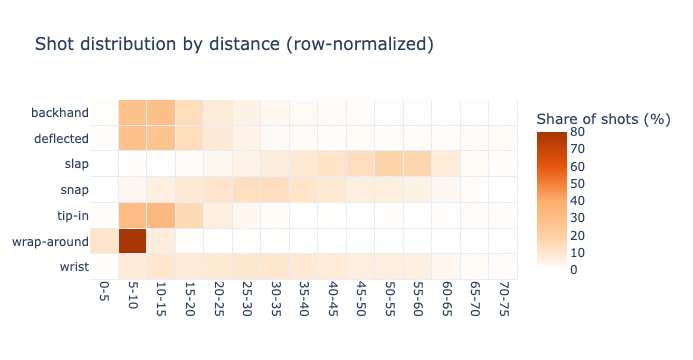

In [38]:
matrix_to_plot = grouped.pivot(index="shot_type", columns="distance_bin", values="shots").fillna(0)

row_pct = matrix_to_plot.div(matrix_to_plot.sum(axis=1).replace(0, np.nan), axis=0) * 100

# build ordered x labels from numeric bins
bins = row_pct.columns.to_numpy()
bin_size = 5

max_bin_start = 70
keep = bins <= max_bin_start
bins = bins[keep]
row_pct = row_pct.loc[:, bins]

x_labels = [f"{int(b)}-{int(b + bin_size)}" for b in bins]

# heatmap
fig = go.Figure(go.Heatmap(
    x=x_labels,
    y=row_pct.index,
    z=row_pct.values,
    colorscale="Blues",
    zmin=0, zmax=100,
    colorbar=dict(title="Share of shots (%)"),
    xgap=1, ygap=1
))
fig.update_layout(
    title="Shot distribution by distance (row-normalized)",
    xaxis=dict(categoryorder='array', categoryarray=x_labels)
)

fig.update_traces(
    colorscale="Oranges",   # darker, colorblind-friendly
    zmin=0, zmax=80,        # limit range
    colorbar=dict(title="Share of shots (%)", tick0=0, dtick=10),
    selector=dict(type="heatmap")
)
fig.update_yaxes(autorange="reversed")
fig.update_xaxes(tickangle=90)

fig.update_traces(
    zmin=0, zmax=80, zauto=False,
    colorscale=[
        [0.00, "rgb(255,255,255)"],   # 0  -> near-white
        [0.125, "rgb(254,230,206)"],  # ~10 -> visible light orange
        [0.25, "rgb(253,208,162)"],
        [0.50, "rgb(253,174,107)"],
        [0.75, "rgb(230,85,13)"],
        [1.00, "rgb(166,54,3)"]
    ],
    colorbar=dict(title="Share of shots (%)", tick0=0, dtick=10),
    selector=dict(type="heatmap")
)


fig.show()

In [39]:
grouped_goals = (
    df_2021.loc[df_2021["event_type"] == "GOAL"]
    .groupby(["shot_type", "distance_bin"])
    .size()
    .rename("goals")
    .reset_index()
    .sort_values(["shot_type", "distance_bin"])
)

# human-friendly bin labels like "0-10"
grouped_goals["bin_label"] = grouped_goals["distance_bin"].map(lambda s: f"{int(s)}-{int(s + bin_size)}")

In [46]:
# merge and compute rate
rates = (grouped
         .merge(grouped_goals, on=['shot_type','distance_bin'], how='left')
         .fillna({'goals': 0}))

rates['goal_rate'] = (rates['goals'] / rates['shots']).replace([np.inf, np.nan], 0).round(3)

# rename labels
rates['bin_label'] = rates['distance_bin'].astype(int).map(lambda s: f"{int(s)}-{int(s + bin_size)}")

# sorted output
'''Visualize the metrics to be sure it is correct'''

print(rates[['shot_type', 'bin_label', 'shots', 'goals', 'goal_rate']].to_string(index=False))

  shot_type bin_label  shots  goals  goal_rate
   backhand       0-5     68   27.0      0.397
   backhand      5-10   2065  416.0      0.201
   backhand     10-15   2085  289.0      0.139
   backhand     15-20   1023   86.0      0.084
   backhand     20-25    586   23.0      0.039
   backhand     25-30    370   16.0      0.043
   backhand     30-35    210    5.0      0.024
   backhand     35-40    169    3.0      0.018
   backhand     40-45     95    5.0      0.053
   backhand     45-50     85    3.0      0.035
   backhand     50-55     64    2.0      0.031
   backhand     55-60     47    0.0      0.000
   backhand     60-65     34    3.0      0.088
   backhand     65-70     45    4.0      0.089
   backhand     70-75     35    1.0      0.029
   backhand     75-80     37    1.0      0.027
   backhand     80-85     46    3.0      0.065
   backhand     85-90     45    1.0      0.022
   backhand     90-95     33    0.0      0.000
   backhand    95-100      7    2.0      0.286
  deflected  

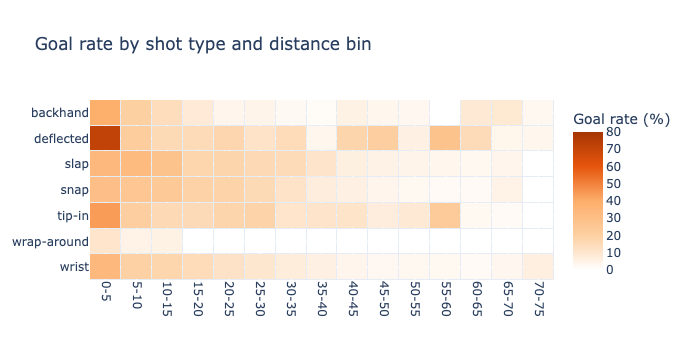

In [41]:
rate_matrix = rates.pivot(index="shot_type", columns="distance_bin", values="goal_rate").fillna(0)

'''Tranform values to percentages'''
rate_matrix *= 100

# --- limit x (bins) to <= 70 and build labels ---
bin_size = 5
bins = rate_matrix.columns.to_numpy()
bins = bins[bins <= 70]
rate_matrix = rate_matrix.loc[:, bins]
x_labels = [f"{int(b)}-{int(b + bin_size)}" for b in bins]

# --- heatmap of GOAL RATE (%) ---
fig = go.Figure(go.Heatmap(
    x=x_labels,
    y=rate_matrix.index,
    z=rate_matrix.values,
    colorscale="Oranges",
    zmin=0, zmax=100,
    colorbar=dict(title="Goal rate (%)"),
    xgap=1, ygap=1
))

fig.update_layout(
    title="Goal rate by shot type and distance bin",
    xaxis=dict(categoryorder='array', categoryarray=x_labels),
)
fig.update_yaxes(autorange="reversed")
fig.update_xaxes(tickangle=90)

# darker orange scale with low values near-white, clamp 0–80 for visibility
fig.update_traces(
    zmin=0, zmax=80, zauto=False,
    colorscale=[
        [0.00, "rgb(255,255,255)"],   # 0  -> near-white
        [0.125, "rgb(254,230,206)"],  # ~10 -> visible light orange
        [0.25, "rgb(253,208,162)"],
        [0.50, "rgb(253,174,107)"],
        [0.75, "rgb(230,85,13)"],
        [1.00, "rgb(166,54,3)"]
    ],
    colorbar=dict(title="Goal rate (%)", tick0=0, dtick=10),
    selector=dict(type="heatmap")
)

fig.show()

### Third Figure_choice

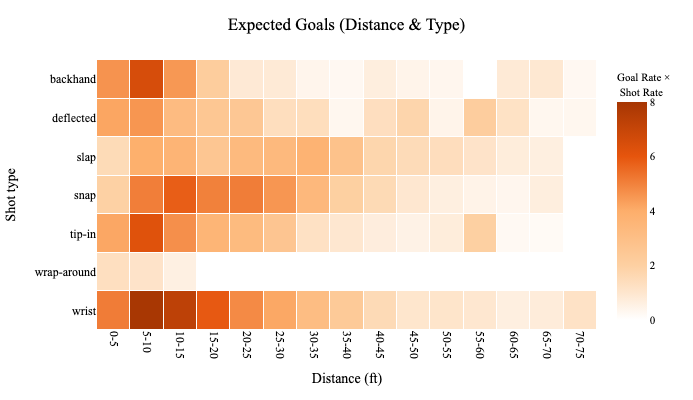

In [48]:
# Share of goals relative to total shots
'''Here we propose a metric that better visualizes the chances of a shot occuring (per type) at a certain distance
and its chances of being a goal. The formula is "scoreα =goal_rate×(shot_share)^α, where 0<α<1).'''

alpha = 0.3  # sqrt damping (0<alpha<1)
total_shots = rates["shots"].sum()
rates["shot_share"] = rates["shots"] / total_shots
rates['goal_rate'] = (rates['goals'] / rates['shots']).replace([np.inf, np.nan], 0).round(3)
rates["metric_damped"] = rates["goal_rate"] * (rates["shot_share"] ** alpha)  # use goal_rate as fraction, not %

# Visualize
Z = rates.pivot(index='shot_type', columns='distance_bin', values='metric_damped').fillna(0) * 100  # % of total goals

# limit the x axis to <= 70
Z = Z.loc[:, [c for c in Z.columns if c <= 70]]

# Labels
x_labels = [f"{int(b)}-{int(b+bin_size)}" for b in Z.columns]

# --- heatmap ---
fig = go.Figure(go.Heatmap(
    x=x_labels,
    y=Z.index,
    z=Z.values,
    zmin=0, zmax=80, zauto=False,
    colorscale=[
        [0.00, "rgb(255,255,255)"],
        [0.125, "rgb(254,230,206)"],
        [0.25, "rgb(253,208,162)"],
        [0.50, "rgb(253,174,107)"],
        [0.75, "rgb(230,85,13)"],
        [1.00, "rgb(166,54,3)"]
    ],
    colorbar=dict(title=dict(text=f"Goal Rate × <br> Shot Rate", font=dict(family=family_titles, size=11, color="black")),
              tickfont=dict(family=family_titles, size=11, color="black")),

    xgap=1, ygap=1,
))

family_titles="Times New Roman"

fig.update_layout(
    font=dict(family=family_titles),  # global family
    title=dict(
        text="Expected Goals (Distance & Type)",
        x=0.5,
        font=dict(size=17, family=family_titles, color="black")
    ),
    plot_bgcolor="white", paper_bgcolor="white",
    xaxis=dict(
        title=dict(text="Distance (ft)", font=dict(size=14, family=family_titles, color="black")),
        tickfont=dict(size=12, family=family_titles, color="black"),
        categoryorder='array', categoryarray=x_labels,
        tickangle=90, showline=False, linecolor="black"
    ),
    yaxis=dict(
        title=dict(text="Shot type", font=dict(size=14, family=family_titles, color="black")),
        tickfont=dict(size=12, family=family_titles, color="black"),
        autorange="reversed", showline=False, linecolor="black"
    ),
    legend=dict(
        font=dict(size=8, family=family_titles, color="black")
    ),
    margin=dict(t=60, r=10, l=90, b=70)
)
fig.update_layout(width=800, height=400)
fig.update_traces(zmin=0, zmax=8, zauto=False, colorbar=dict(tick0=0, dtick=2), selector=dict(type="heatmap"))

fig.write_image(OUT_PATH_VIS+"Heatmap_2020_2021.png", scale=5)
fig.write_image(OUT_PATH_VIS+"Heatmap_2020_2021.svg")
fig.show()

### Alternative options for Third Figure

In [43]:
''' Alternative Proposal for Vis if previous is not clear (to become pretty if chosen)'''

# --- Shots: row-normalized (%) ---
matrix_shots = grouped.pivot(index="shot_type", columns="distance_bin", values="shots").fillna(0)
row_pct = matrix_shots.div(matrix_shots.sum(axis=1).replace(0, np.nan), axis=0) * 100

# --- Goals: goal rate (%) = goals / shots ---
rates = (
    grouped.merge(grouped_goals, on=["shot_type", "distance_bin"], how="left")
           .fillna({"goals": 0})
)
rates["goal_rate_pct"] = (rates["goals"] / rates["shots"]).replace([np.inf, np.nan], 0) * 100
rate_matrix = rates.pivot(index="shot_type", columns="distance_bin", values="goal_rate_pct").fillna(0)

# --- Align columns & limit x to <= 70 (e.g., 70–75 upper bin) ---
bin_size = 5
bins = np.intersect1d(row_pct.columns.to_numpy(), rate_matrix.columns.to_numpy())
bins = bins[bins <= 70]
row_pct = row_pct.loc[:, bins]
rate_matrix = rate_matrix.loc[:, bins]
x_labels = [f"{int(b)}-{int(b + bin_size)}" for b in bins]

# --- Subplots: two heatmaps, no hover ---
fig = make_subplots(
    rows=2, cols=1, shared_xaxes=True,
    vertical_spacing=0.08,
    subplot_titles=("Share of shots per distance (row-normalized, %)",
                    "Goal rate per distance (%)")
)

# Heatmap 1: shots share (Blues)
fig.add_trace(
    go.Heatmap(
        x=x_labels, y=row_pct.index, z=row_pct.values,
        zmin=0, zmax=100,
        colorscale="Blues",
        colorbar=dict(title="Share (%)"),
        xgap=1, ygap=1,
        hoverinfo="skip", hovertemplate=None
    ),
    row=1, col=1
)

# Heatmap 2: goal rate (custom Oranges, 0–80 clamp)
fig.add_trace(
    go.Heatmap(
        x=x_labels, y=rate_matrix.index, z=rate_matrix.values,
        zmin=0, zmax=80, zauto=False,
        colorscale=[
            [0.00, "rgb(255,255,255)"],   # 0 -> near-white
            [0.125, "rgb(254,230,206)"],  # ~10 -> visible
            [0.25, "rgb(253,208,162)"],
            [0.50, "rgb(253,174,107)"],
            [0.75, "rgb(230,85,13)"],
            [1.00, "rgb(166,54,3)"]
        ],
        colorbar=dict(title="Goal rate (%)", tick0=0, dtick=10),
        xgap=1, ygap=1,
        hoverinfo="skip", hovertemplate=None
    ),
    row=2, col=1
)

# Layout & axes
fig.update_layout(
    title="Shots vs Goal Rate by Distance & Shot Type",
    plot_bgcolor="white", paper_bgcolor="white",
    margin=dict(t=70, r=10, l=90, b=70),
    showlegend=False
)

# Axes styling (reverse y to match your prior choice; vertical x labels)
fig.update_xaxes(categoryorder='array', categoryarray=x_labels, tickangle=90, row=2, col=1)
fig.update_yaxes(autorange="reversed", showline=True, linecolor="black", row=1, col=1)
fig.update_yaxes(autorange="reversed", showline=True, linecolor="black", row=2, col=1)
fig.update_xaxes(showline=True, linecolor="black", row=2, col=1)

# Optional: export static (requires kaleido)
# fig.write_image("combined_heatmaps.png", scale=4)

fig.show()


NameError: name 'make_subplots' is not defined